# tugas pra uts

*kelompok 14, anggota:*

**- Raihan Akira Rahmaputra (105222040)**

**- Gema Fitri Ramadani (105222009)**

**Klasifikasi Gambar**

Link repo github: https://github.com/akiraraihaan/prak_ml_pra_uts

***--EDA--***

Jumlah gambar anemic: 2563
Jumlah gambar non-anemic: 1714


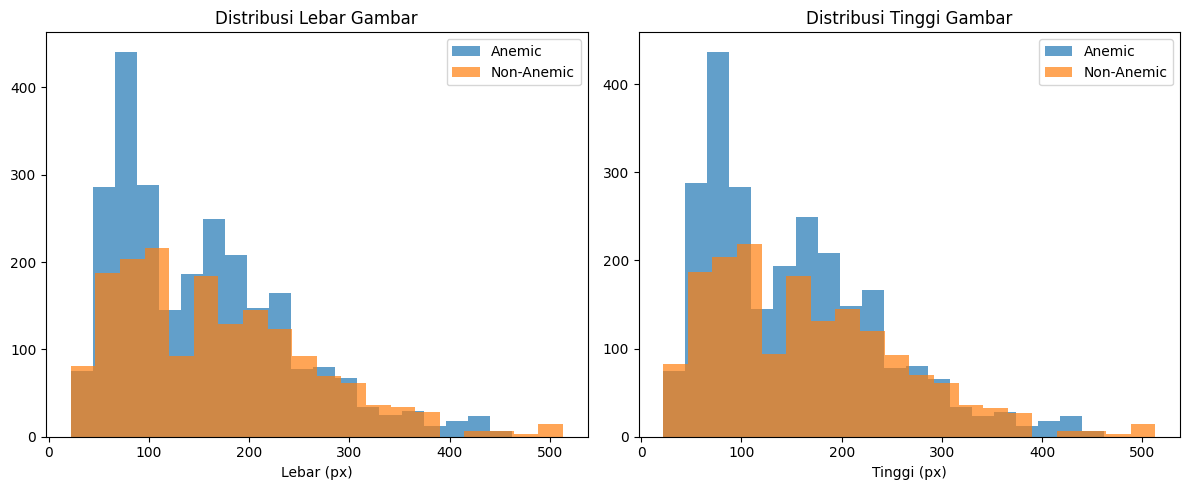

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

anemic_path = "./dataset/anemic"
nonanemic_path = "./dataset/nonanemic"

# Ambil file
anemic_files = os.listdir(anemic_path)
nonanemic_files = os.listdir(nonanemic_path)

print(f"Jumlah gambar anemic: {len(anemic_files)}")
print(f"Jumlah gambar non-anemic: {len(nonanemic_files)}")

# Ukuran rata-rata gambar
def get_image_shapes(folder_path):
    sizes = []
    for filename in os.listdir(folder_path):
        try:
            img = Image.open(os.path.join(folder_path, filename))
            sizes.append(img.size)
        except:
            continue
    return sizes

anemic_sizes = get_image_shapes(anemic_path)
nonanemic_sizes = get_image_shapes(nonanemic_path)

# Distribusi ukuran gambar
anemic_widths = [s[0] for s in anemic_sizes]
anemic_heights = [s[1] for s in anemic_sizes]
nonanemic_widths = [s[0] for s in nonanemic_sizes]
nonanemic_heights = [s[1] for s in nonanemic_sizes]

plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.hist(anemic_widths, bins=20, alpha=0.7, label='Anemic')
plt.hist(nonanemic_widths, bins=20, alpha=0.7, label='Non-Anemic')
plt.title("Distribusi Lebar Gambar")
plt.xlabel("Lebar (px)")
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(anemic_heights, bins=20, alpha=0.7, label='Anemic')
plt.hist(nonanemic_heights, bins=20, alpha=0.7, label='Non-Anemic')
plt.title("Distribusi Tinggi Gambar")
plt.xlabel("Tinggi (px)")
plt.legend()
plt.tight_layout()
plt.show()


In [3]:
img_size = (128, 128)

# Menyimpan gambar
X_anemic = []
X_nonanemic = []

# Fungsi untuk load dan resize gambar
def load_images_from_folder(folder_path, img_size):
    images = []
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            path = os.path.join(folder_path, filename)
            try:
                img = Image.open(path).convert('L')  # konversi ke grayscale
                img = img.resize(img_size)
                images.append(np.array(img))
            except Exception as e:
                print(f"Error loading image {filename}: {e}")
    return images

# Load gambar anemic
X_anemic = load_images_from_folder(anemic_path, img_size)

# Load gambar non-anemic
X_nonanemic = load_images_from_folder(nonanemic_path, img_size)

# Konversi ke numpy array
X_anemic = np.array(X_anemic)
X_nonanemic = np.array(X_nonanemic)

print(f"Total gambar anemic: {len(X_anemic)}")
print(f"Total gambar non-anemic: {len(X_nonanemic)}")
print(f"Bentuk contoh gambar: {X_anemic[0].shape}")

Total gambar anemic: 2563
Total gambar non-anemic: 1714
Bentuk contoh gambar: (128, 128)


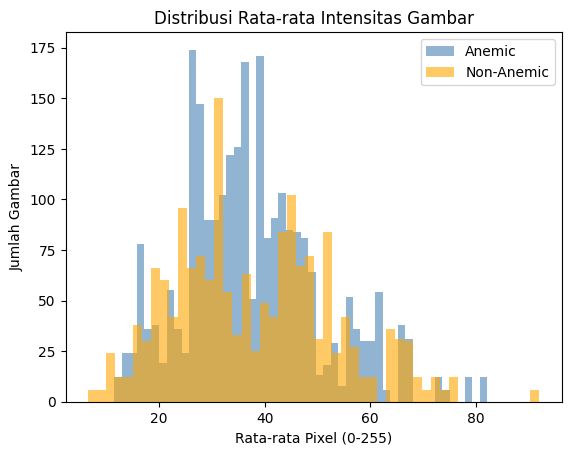

In [4]:
import matplotlib.pyplot as plt

means_anemic = [np.mean(img) for img in X_anemic]
means_nonanemic = [np.mean(img) for img in X_nonanemic]

plt.hist(means_anemic, bins=50, alpha=0.6, label="Anemic", color='steelblue')
plt.hist(means_nonanemic, bins=50, alpha=0.6, label="Non-Anemic", color='orange')
plt.title("Distribusi Rata-rata Intensitas Gambar")
plt.xlabel("Rata-rata Pixel (0-255)")
plt.ylabel("Jumlah Gambar")
plt.legend()
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_40092\3047238643.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_all, x='label', y='mean_intensity', palette=['#5DADE2', '#F5B041'])


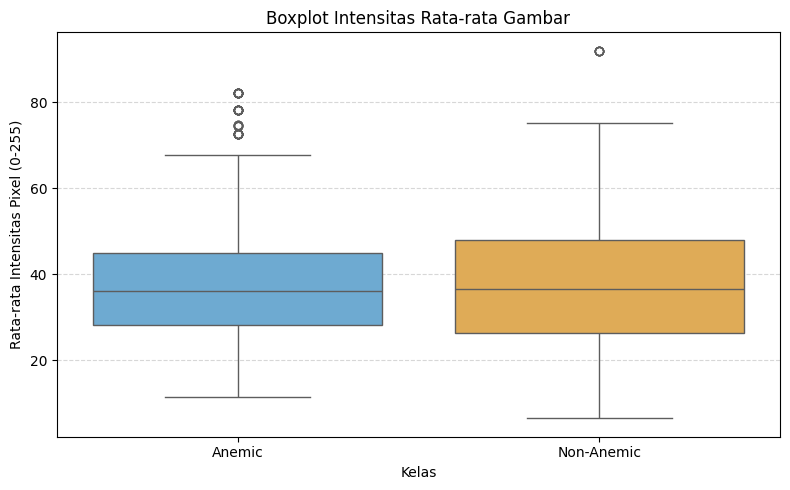

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Gabungkan hasil mean intensitas ke satu DataFrame
df_anemic = pd.DataFrame({
    'mean_intensity': means_anemic,
    'label': 'Anemic'
})

df_nonanemic = pd.DataFrame({
    'mean_intensity': means_nonanemic,
    'label': 'Non-Anemic'
})

df_all = pd.concat([df_anemic, df_nonanemic])

# Plot boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_all, x='label', y='mean_intensity', palette=['#5DADE2', '#F5B041'])
plt.title("Boxplot Intensitas Rata-rata Gambar")
plt.ylabel("Rata-rata Intensitas Pixel (0-255)")
plt.xlabel("Kelas")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## Kesimpulan EDA

1. **Distribusi Ukuran Gambar Tidak Konsisten**  
   Gambar memiliki tinggi dan lebar yang sangat bervariasi. Hal ini dapat menyebabkan model kesulitan dalam membandingkan fitur antar gambar jika tidak dilakukan standarisasi ukuran.

2. **Jumlah Data Tidak Seimbang**  
   Dataset kelas *Anemic* memiliki lebih banyak gambar (~2563) dibandingkan kelas *Non-Anemic* (~1714), sehingga terdapat potensi ketimpangan kelas yang dapat memengaruhi performa model.

3. **Distribusi Rata-rata Intensitas Pixel Tumpang Tindih**  
   Sebagian besar gambar kedua kelas memiliki nilai rata-rata intensitas pixel dalam rentang yang saling tumpang tindih, terutama antara 30–60. Hal ini menandakan bahwa klasifikasi hanya berdasarkan satu fitur seperti intensitas rata-rata kurang memadai.

4. **Outlier Berdasarkan Distribusi Intensitas**
   Boxplot menunjukkan bahwa:
   - Kelas **Anemic** memiliki beberapa outlier di atas nilai 70, dengan distribusi intensitas rata-rata terkonsentrasi antara 25–45.
   - Kelas **Non-Anemic** memiliki outlier ekstrem mendekati nilai 90, dengan sebaran lebih lebar dibanding kelas Anemic.



# pre-processing
1. Load dan resize gambar

In [6]:
import os
from PIL import Image
import numpy as np
from tqdm import tqdm

def load_and_resize_images(folder_path, label, target_size=(128, 128)): 
    images = []
    labels = []

    for file in tqdm(os.listdir(folder_path)):
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(folder_path, file)
            try:
                img = Image.open(img_path).convert('L')  # grayscale
                img = img.resize(target_size)
                img_array = np.array(img).flatten()  # flatten image
                images.append(img_array)
                labels.append(label)
            except:
                print(f"Failed to load {img_path}")

    return images, labels


2. Menggabung data

In [27]:
# Load Anemic dan Non-Anemic
anemic_images, anemic_labels = load_and_resize_images(anemic_path, label=1)
nonanemic_images, nonanemic_labels = load_and_resize_images(nonanemic_path, label=0)

# Gabung
X = np.array(anemic_images + nonanemic_images)
y = np.array(anemic_labels + nonanemic_labels)

print(f"Total data: {X.shape}, Total label: {y.shape}")

100%|██████████| 1714/1714 [00:04<00:00, 399.56it/s]


Total data: (4277, 16384), Total label: (4277,)


3. Split Data & Normalisasi gambar

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

4. Mengatasi outlier

In [ ]:
from scipy.stats import zscore

# Hitung rata-rata intensitas tiap gambar
mean_intensity_train = X_train_scaled.mean(axis=1)

# Hitung Z-score dari intensitas
z_scores_train = zscore(mean_intensity_train)

# Tetapkan ambang batas outlier (biasanya |z| > 3)
mask_train = np.abs(z_scores_train) < 3

# Hapus outlier
X_train_clean = X_train_scaled[mask_train]
y_train_clean = y_train[mask_train]


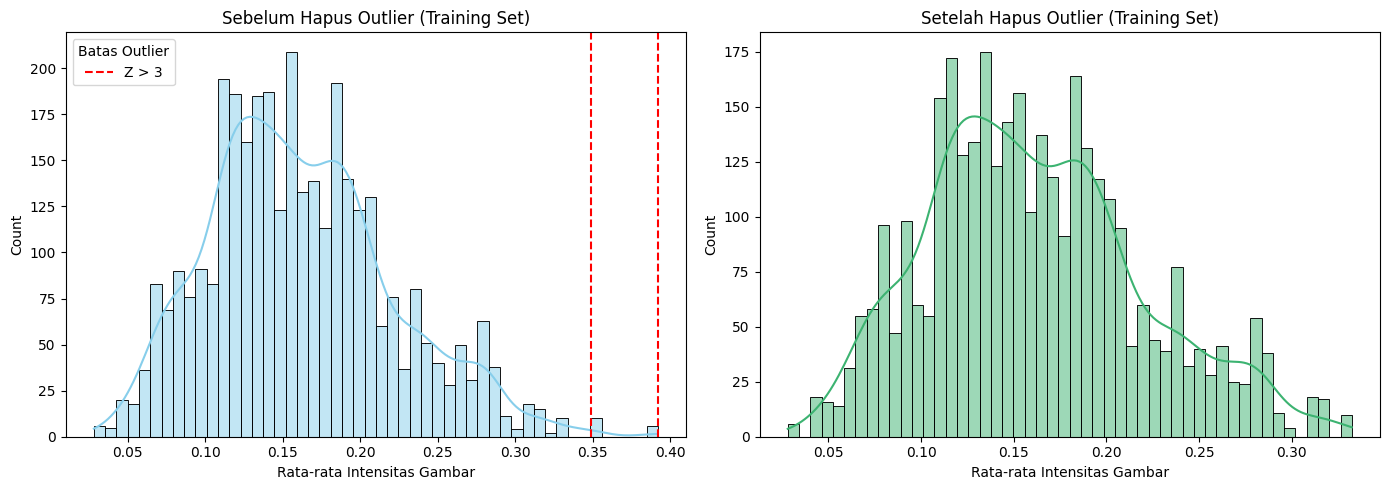

In [20]:
from scipy.stats import zscore

# Hitung rata-rata intensitas HANYA pada data training
mean_intensity_train = X_train_scaled.mean(axis=1)

# Hitung Z-score dari intensitas pada data training
z_scores_train = zscore(mean_intensity_train)

# Tetapkan ambang batas outlier untuk data training (|z| > 3)
mask_train = np.abs(z_scores_train) < 3

# Hapus outlier hanya dari data training
X_train_clean = X_train_scaled[mask_train]
y_train_clean = y_train[mask_train]

# Untuk visualisasi outlier (opsional) - sesuaikan dengan variabel baru
import matplotlib.pyplot as plt
import seaborn as sns

# Buat figure side-by-side
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Visualisasi Sebelum Hapus Outlier
sns.histplot(mean_intensity_train, bins=50, kde=True, ax=axs[0], color='skyblue')
axs[0].set_title("Sebelum Hapus Outlier (Training Set)")
axs[0].set_xlabel("Rata-rata Intensitas Gambar")
if np.any(z_scores_train > 3):
    axs[0].axvline(mean_intensity_train[z_scores_train > 3].min(), color='red', linestyle='--', label='Z > 3')
    axs[0].axvline(mean_intensity_train[z_scores_train > 3].max(), color='red', linestyle='--')
    axs[0].legend(title="Batas Outlier")
if np.any(z_scores_train < -3):
    axs[0].axvline(mean_intensity_train[z_scores_train < -3].max(), color='purple', linestyle='--', label='Z < -3')
    axs[0].legend(title="Batas Outlier")

# Setelah Hapus Outlier
mean_filtered = mean_intensity_train[np.abs(z_scores_train) < 3]
sns.histplot(mean_filtered, bins=50, kde=True, ax=axs[1], color='mediumseagreen')
axs[1].set_title("Setelah Hapus Outlier (Training Set)")
axs[1].set_xlabel("Rata-rata Intensitas Gambar")

plt.tight_layout()
plt.show()

# Mengatasi imbalanced data

In [21]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Terapkan Random Oversampling pada data latih yang sudah dibersihkan
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_clean, y_train_clean)

# Cek distribusi sebelum dan sesudah oversampling
print("Distribusi label sebelum oversampling:", Counter(y_train_clean))
print("Distribusi label setelah oversampling:", Counter(y_train_resampled))

Distribusi label sebelum oversampling: Counter({1: 2040, 0: 1365})
Distribusi label setelah oversampling: Counter({0: 2040, 1: 2040})


# Inisialisasi dan training model

In [22]:
from sklearn.ensemble import RandomForestClassifier

# Gunakan data hasil oversampling untuk training
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(random_state=42)

# Evaluasi Model 

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = rf_model.predict(X_test_scaled)

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[299  44]
 [ 30 483]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       343
           1       0.92      0.94      0.93       513

    accuracy                           0.91       856
   macro avg       0.91      0.91      0.91       856
weighted avg       0.91      0.91      0.91       856



# Hasil dan Kesimpulan
1. Akurasi keseluruhan model mencapai 91%, menunjukkan bahwa model memiliki performa yang sangat baik dalam membedakan gambar penderita anemia dan non-anemia.

2. Recall kelas Anemia (0.95) sangat tinggi, yang berarti sebagian besar kasus anemia berhasil dideteksi. Ini penting karena mengurangi risiko salah diagnosis (false negative) terhadap pasien anemia.

3. Precision kelas Non-Anemia (0.92) juga tinggi, menunjukkan bahwa ketika model memprediksi non-anemia, kemungkinan besar prediksi tersebut benar.

4. F1-score yang seimbang pada kedua kelas (0.88 dan 0.93) mengindikasikan trade-off precision dan recall yang stabil, bahkan dengan dataset awal yang imbalanced.

5. Oversampling efektif: Performa yang cukup seimbang antar kelas menunjukkan bahwa penerapan oversampling pada data latih berhasil mengurangi bias terhadap kelas mayoritas.

# test cross-validation

In [24]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Menyimpan metrik tiap fold
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Lakukan cross-validation yang benar (oversampling di dalam loop)
# Perhatikan kita gunakan X_train_scaled dan y_train (sebelum pembersihan outlier)
# untuk memastikan validasi silang yang benar

for train_idx, val_idx in skf.split(X_train_scaled, y_train):
    # Split data training untuk fold ini
    X_fold_train, X_fold_val = X_train_scaled[train_idx], X_train_scaled[val_idx]
    y_fold_train, y_fold_val = y_train[train_idx], y_train[val_idx]
    
    # Deteksi dan hapus outlier dari fold training
    mean_intensity_fold = X_fold_train.mean(axis=1)
    z_scores_fold = zscore(mean_intensity_fold)
    mask_fold = np.abs(z_scores_fold) < 3
    
    # Bersihkan fold training dari outlier
    X_fold_train_clean = X_fold_train[mask_fold]
    y_fold_train_clean = y_fold_train[mask_fold]
    
    # Lakukan oversampling hanya pada training data fold yang sudah dibersihkan
    ros = RandomOverSampler(random_state=42)
    X_fold_train_resampled, y_fold_train_resampled = ros.fit_resample(X_fold_train_clean, y_fold_train_clean)
    
    # Train model pada data yang sudah dioversampling
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_fold_train_resampled, y_fold_train_resampled)
    
    # Evaluasi pada validation fold (data asli, bukan hasil oversampling)
    y_fold_pred = model.predict(X_fold_val)
    
    # Hitung metrik
    accuracies.append(accuracy_score(y_fold_val, y_fold_pred))
    precisions.append(precision_score(y_fold_val, y_fold_pred))
    recalls.append(recall_score(y_fold_val, y_fold_pred))
    f1_scores.append(f1_score(y_fold_val, y_fold_pred))

# Tampilkan hasil rata-rata dan standar deviasi
print("Cross-Validation Results (5-Fold):")
print(f"Accuracy:  {np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}")
print(f"Precision: {np.mean(precisions):.4f} ± {np.std(precisions):.4f}")
print(f"Recall:    {np.mean(recalls):.4f} ± {np.std(recalls):.4f}")
print(f"F1 Score:  {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")

Cross-Validation Results (5-Fold):
Accuracy:  0.8588 ± 0.0093
Precision: 0.8595 ± 0.0135
Recall:    0.9141 ± 0.0084
F1 Score:  0.8859 ± 0.0067


# visualisasi

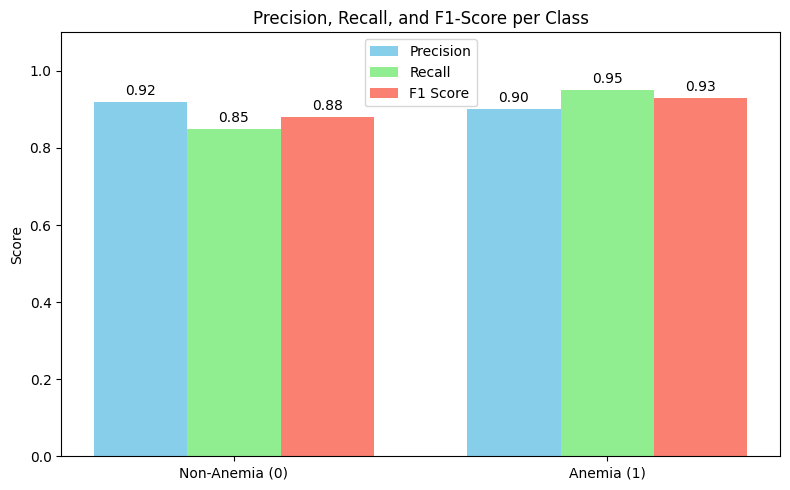

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Metrik hasil evaluasi model (dari classification report)
metrics = {
    "Class": ["Non-Anemia (0)", "Anemia (1)"],
    "Precision": [0.92, 0.90],
    "Recall": [0.85, 0.95],
    "F1-Score": [0.88, 0.93]
}

# Konversi ke array untuk plotting
classes = metrics["Class"]
precision = metrics["Precision"]
recall = metrics["Recall"]
f1_score = metrics["F1-Score"]
x = np.arange(len(classes))  # lokasi label
width = 0.25  # lebar bar

# Plot
fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width, precision, width, label='Precision', color='skyblue')
bars2 = ax.bar(x, recall, width, label='Recall', color='lightgreen')
bars3 = ax.bar(x + width, f1_score, width, label='F1 Score', color='salmon')

# Labeling
ax.set_ylabel('Score')
ax.set_title('Precision, Recall, and F1-Score per Class')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.set_ylim(0, 1.1)
ax.legend()

# Tambahkan label nilai di atas bar
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()


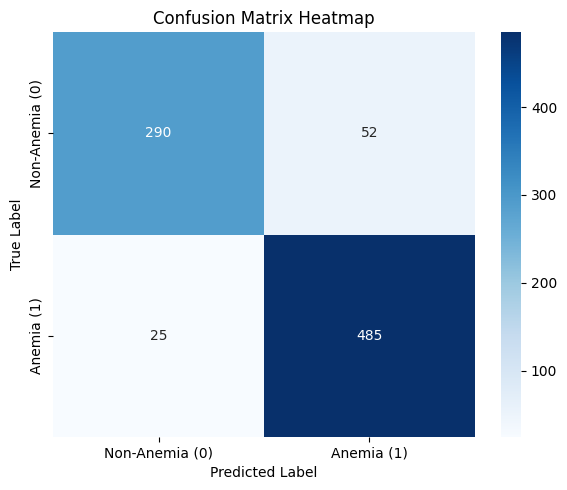

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Data dari hasil evaluasi model (dari confusion matrix sebelumnya)
# Prediksi vs aktual
y_true = [0]*342 + [1]*510  # Jumlah support dari classification report
y_pred = [0]*290 + [1]*52 + [0]*25 + [1]*485  # Berdasarkan confusion matrix [[290, 52], [25, 485]]

# Hitung confusion matrix
cm = confusion_matrix(y_true, y_pred)
labels = ['Non-Anemia (0)', 'Anemia (1)']

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.tight_layout()
plt.show()
